In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 基础条形图绘制：

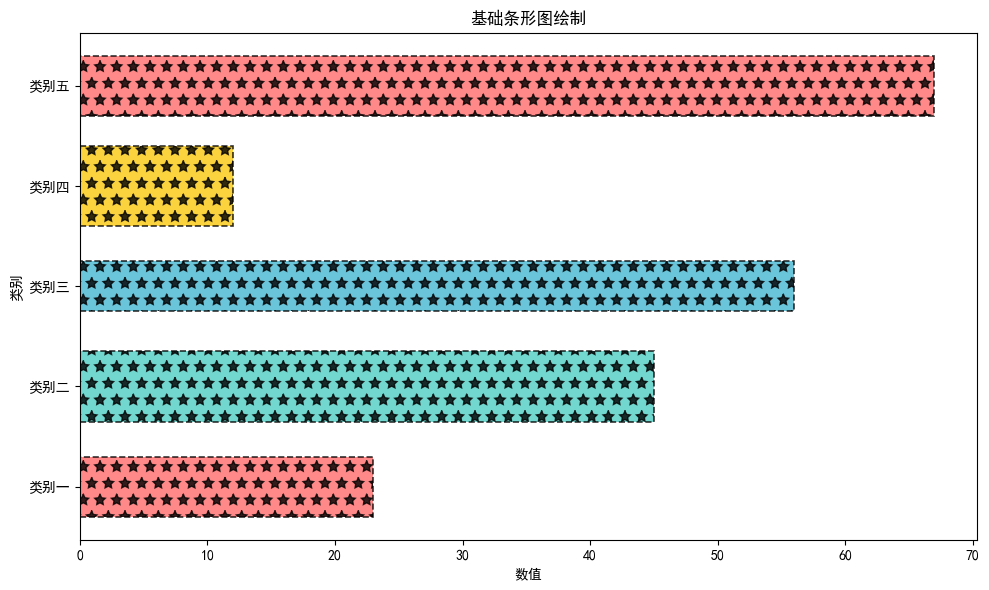

In [3]:
# 准备数据
categories = ['产品A', '产品B', '产品C', '产品D', '产品E']
values = [23, 45, 56, 12, 67]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制水平条形图
plt.barh(categories, 
         values, 
         color=colors, 
         height=[0.6, 0.7, 0.5, 0.8, 0.6], 
         edgecolor='black',
         linewidth=1.2,
         linestyle='--',
         alpha=0.8,
         tick_label=['类别一', '类别二', '类别三', '类别四', '类别五'],
         hatch='*',
         label='图例')

# 添加标题和标签
plt.title('基础条形图绘制')
plt.xlabel('数值')
plt.ylabel('类别')

# 显示图形
plt.tight_layout()
plt.show()

# 示例 1：添加标注数值&参考线

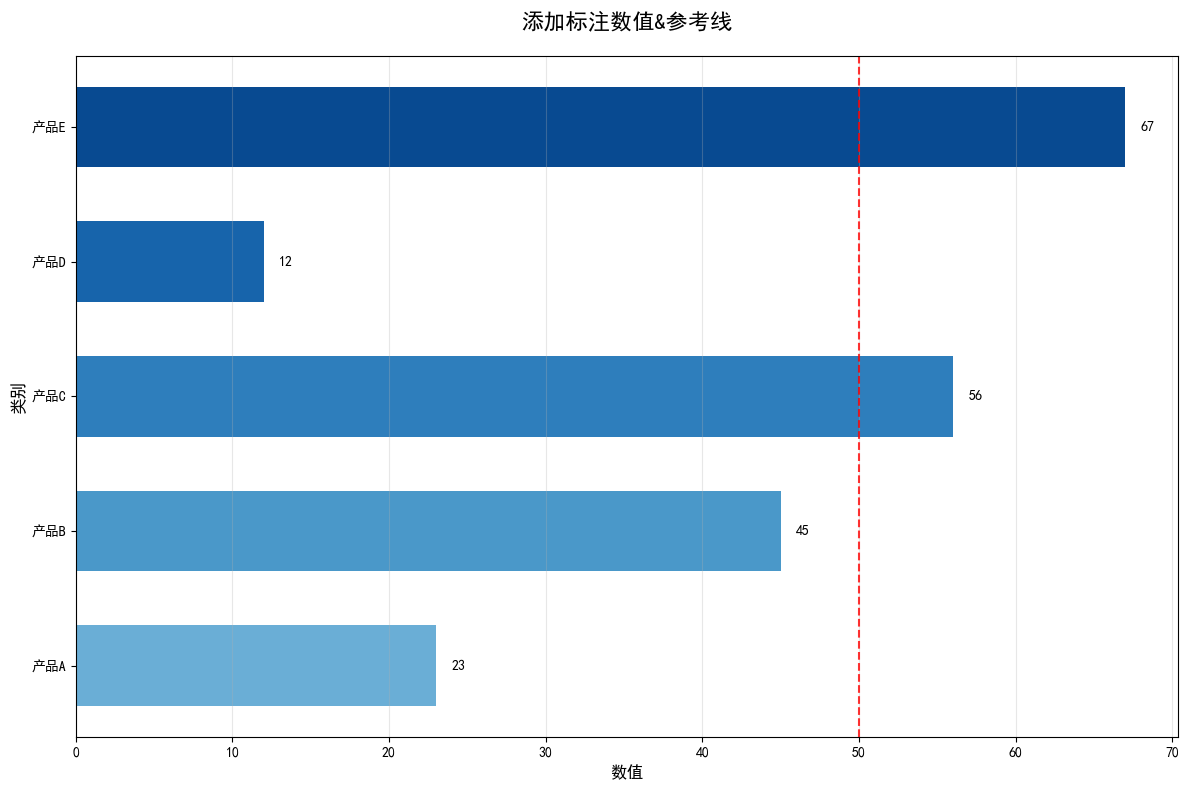

In [4]:
# 创建更美观的条形图
plt.figure(figsize=(12, 8))

# 使用渐变色 - 修复颜色数组与数据长度匹配问题
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(values)))

bars = plt.barh(categories, values, color=colors, height=0.6)

# 添加数值标签
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width}', ha='left', va='center')

# 添加参考线
plt.axvline(x=50, color='red', linestyle='--', alpha=0.8) 

# 美化样式
plt.grid(axis='x', alpha=0.3)
plt.xlabel('数值', fontsize=12)
plt.ylabel('类别', fontsize=12)
plt.title('添加标注数值&参考线', fontsize=16, pad=20)

# 调整布局
plt.tight_layout()
plt.show()

# 示例 2：多数据长条图：

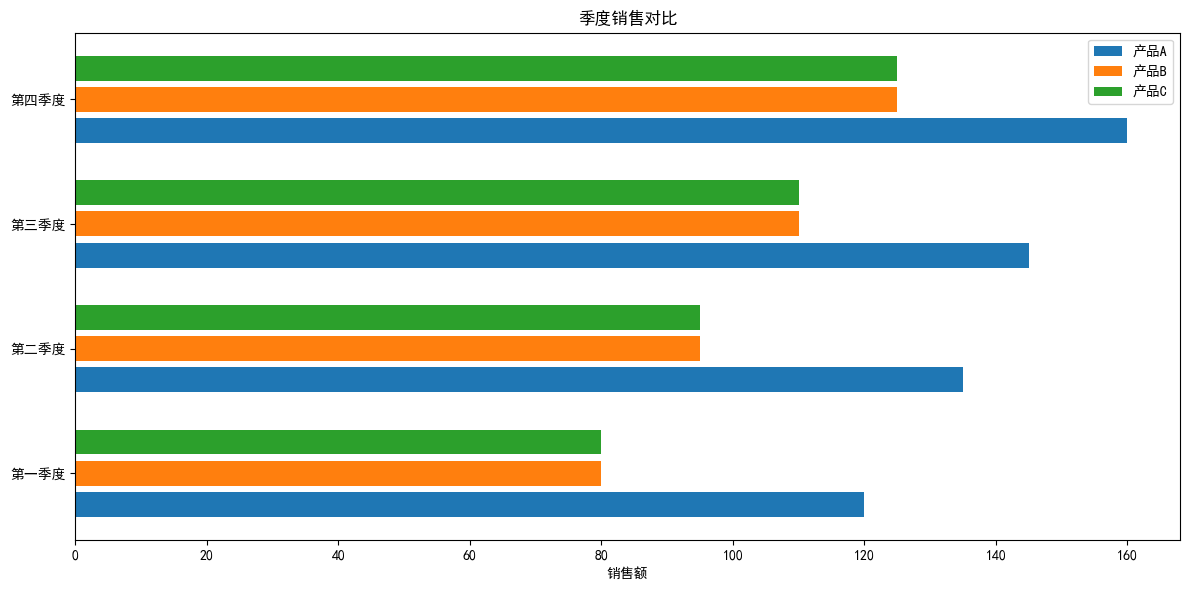

In [5]:
# 准备多组数据
categories = ['第一季度', '第二季度', '第三季度', '第四季度']
sales_A = [120, 135, 145, 160]
sales_B = [80, 95, 110, 125]
sales_C = [80, 95, 110, 125]

# 设置位置
y = np.arange(len(categories))

# 条形高度
height = 0.25

# 绘制分组条形图
plt.figure(figsize=(12, 6))
plt.barh(y - height, sales_A, height-0.05, label='产品A')
plt.barh(y , sales_B, height-0.05, label='产品B')
plt.barh(y + height, sales_C, height-0.05, label='产品C')

# 设置y轴刻度和标签
plt.yticks(y, categories)
plt.xlabel('销售额')
plt.title('季度销售对比')
plt.legend()
plt.tight_layout()
plt.show()

# 示例 3：堆叠图

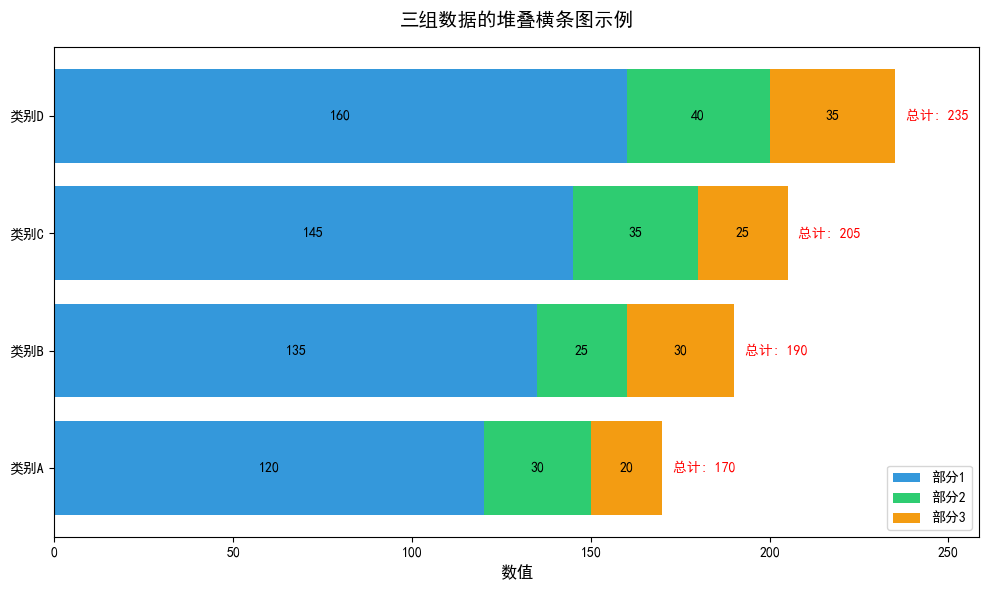

In [6]:
# 准备堆叠数据和类别
categories = ['类别A', '类别B', '类别C', '类别D']  # 添加类别数据
values1 = [120, 135, 145, 160]  # 第一组数据
values2 = [30, 25, 35, 40]      # 第二组数据
values3 = [20, 30, 25, 35]      # 新增第三组数据

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制三组堆叠横条图
bar1 = plt.barh(categories, values1, label='部分1', color='#3498db')
bar2 = plt.barh(categories, values2, left=values1, label='部分2', color='#2ecc71')
bar3 = plt.barh(categories, values3, left=np.array(values1) + np.array(values2), 
                label='部分3', color='#f39c12')

# 添加数据标注
def add_labels(bars, values, offset=0):
    """为条形图添加数据标注"""
    for bar, value in zip(bars, values):
        width = bar.get_width()
        # 计算标注位置
        x_pos = bar.get_x() + width / 2 + offset
        # 添加标注文本
        plt.text(x_pos, bar.get_y() + bar.get_height()/2,
                 f'{value}', ha='center', va='center', 
                 fontweight='bold', color='black')

# 为三组数据分别添加标注
add_labels(bar1, values1)
add_labels(bar2, values2)  # 偏移量使标注在本组中心
add_labels(bar3, values3)

# 添加总计标注（显示每组数据总和）
totals = [v1+v2+v3 for v1, v2, v3 in zip(values1, values2, values3)]
for i, total in enumerate(totals):
    plt.text(total + 3, i, f'总计: {total}', va='center', color='red')

# 设置图表属性
plt.xlabel('数值', fontsize=12)
plt.title('三组数据的堆叠横条图示例', fontsize=14, pad=15)
plt.legend(loc='lower right')
plt.xlim(0, max(totals) * 1.1)  # 调整x轴范围，避免标注超出
plt.tight_layout()

# 显示图表
plt.show()


# 示例 4：负值条形 & 双向图

### 负值条形

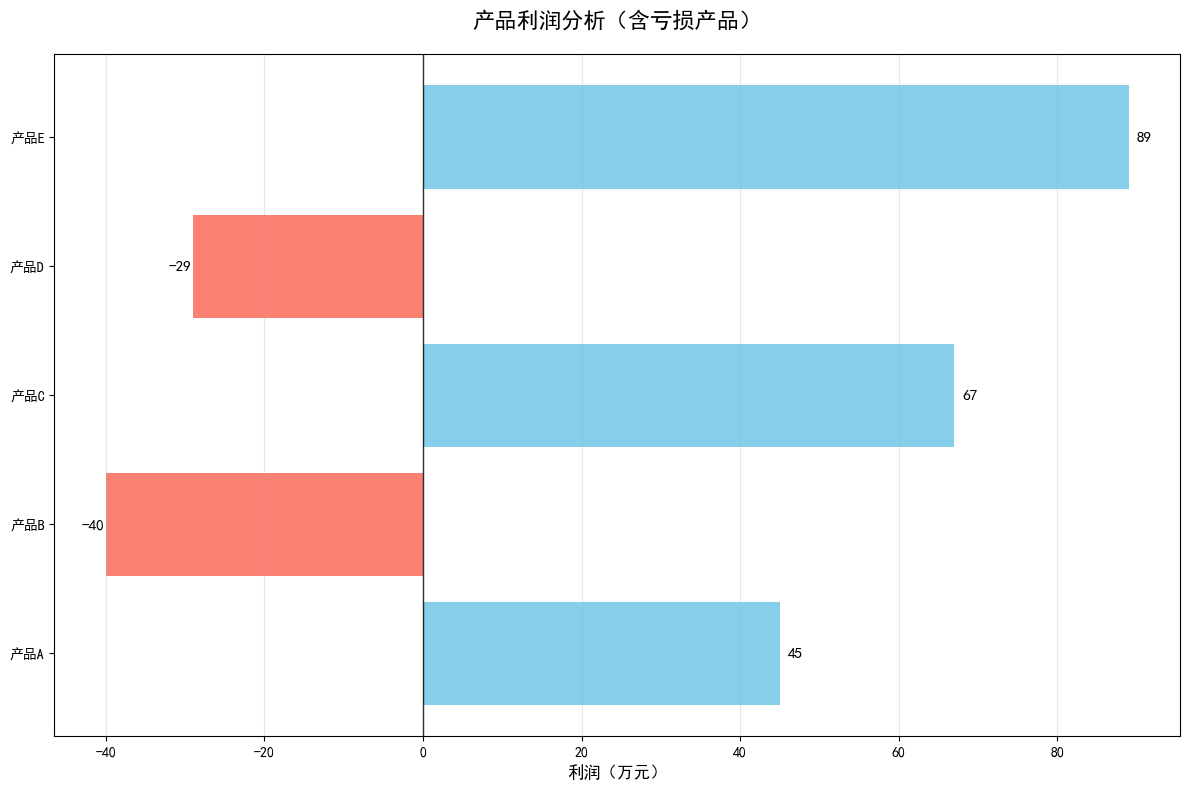

In [7]:
# 准备包含负值的数据
categories = ['产品A', '产品B', '产品C', '产品D', '产品E']
profits = [45, -40, 67, -29, 89]

plt.figure(figsize=(12, 8))

# 绘制条形图
bars = plt.barh(categories, profits, color=np.where(np.array(profits) >= 0, 'skyblue', 'salmon'))

# 添加零参考线
plt.axvline(x=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# 添加数据标签
for bar in bars:
    width = bar.get_width()
    label_x = width + 1 if width >= 0 else width - 3
    plt.text(label_x, bar.get_y() + bar.get_height()/2,
             f'{width}', va='center', fontsize=11,
             color='black')

plt.xlabel('利润（万元）', fontsize=12)
plt.title('产品利润分析（含亏损产品）', fontsize=16, pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 双向条形图

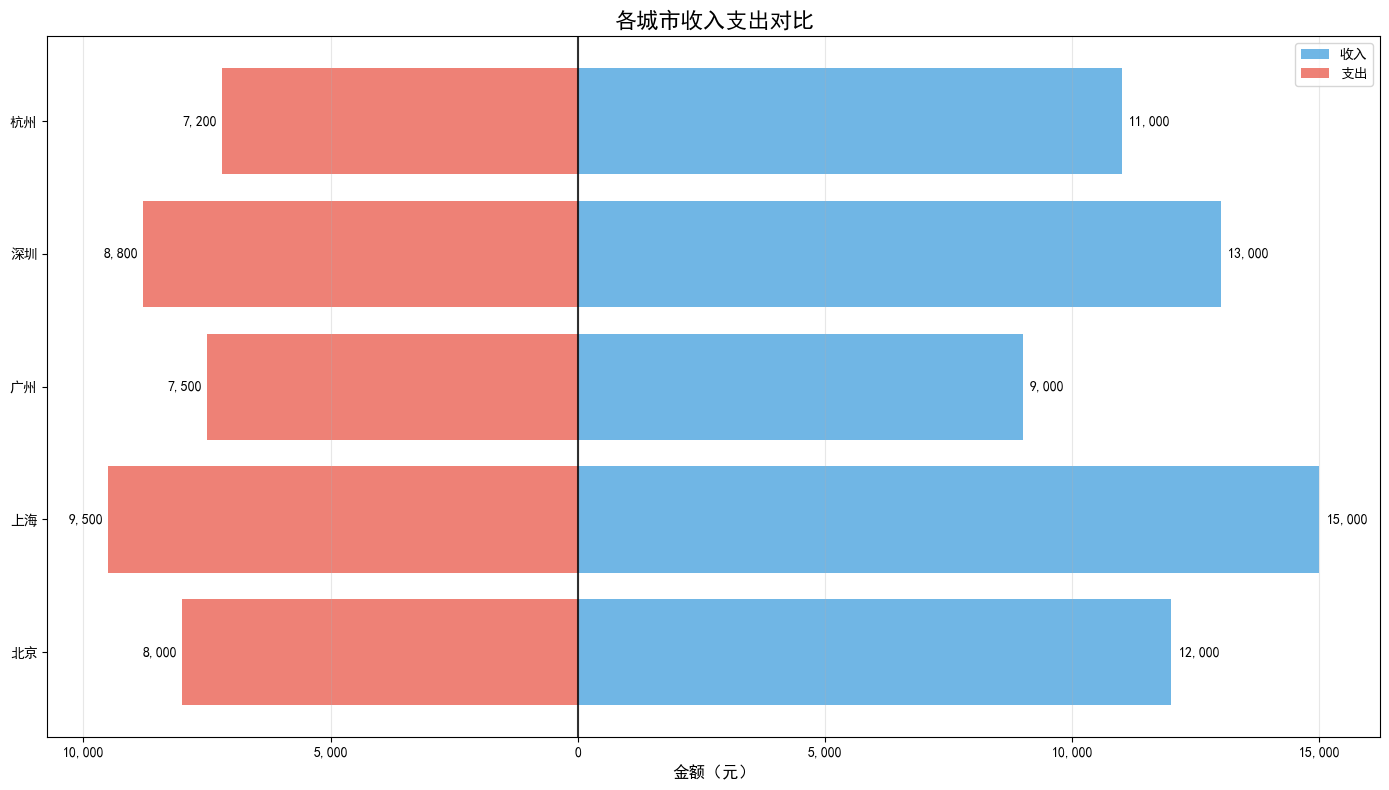

In [8]:
# 导入matplotlib的FuncFormatter工具，用于自定义坐标轴刻度格式
from matplotlib.ticker import FuncFormatter

# 准备对比数据
categories = ['北京', '上海', '广州', '深圳', '杭州']
income = [12000, 15000, 9000, 13000, 11000]
expense = [-8000, -9500, -7500, -8800, -7200]

plt.figure(figsize=(14, 8))

# 绘制收入条形（向右）
bars1 = plt.barh(categories, income, color='#3498db', alpha=0.7, label='收入')

# 绘制支出条形（向左）
bars2 = plt.barh(categories, expense, color='#e74c3c', alpha=0.7, label='支出')

# 添加零线
plt.axvline(x=0, color='black', linestyle='-', alpha=0.8)

# 添加数据标签
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        # 根据条形方向设置标签位置
        if width >= 0:
            label_x = width + max(income) * 0.01
            ha = 'left'
        else:
            label_x = width - max(np.abs(expense)) * 0.01
            ha = 'right'
        
        plt.text(label_x, bar.get_y() + bar.get_height()/2,
                 f'{abs(width):,}', va='center', ha=ha, fontsize=10)

# 定义x轴刻度格式化函数：将刻度值转换为绝对值
def format_func(value, tick_number):
    return f'{abs(int(value)):,}'
# 应用自定义格式化函数到x轴主刻度，实现负值刻度显示为正值
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

plt.xlabel('金额（元）', fontsize=12)
plt.title('各城市收入支出对比', fontsize=16)
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 示例 5：样式美化技巧

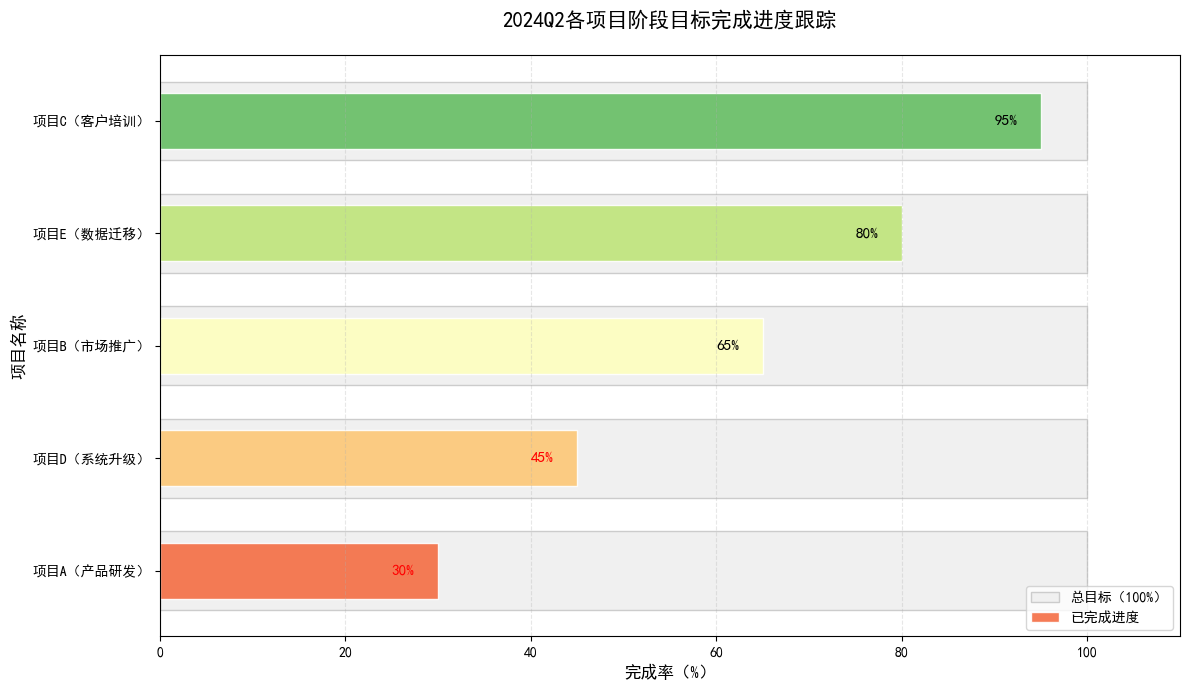

In [9]:
# 项目数据：项目名称 + 当前完成率（%）
projects = ['项目A（产品研发）', '项目B（市场推广）', '项目C（客户培训）', '项目D（系统升级）', '项目E（数据迁移）']
completion_rates = [30, 65, 95, 45, 80]
total_target = 100  # 总目标：100%

# 将项目与完成率组合并按完成率升序排序
combined = list(zip(projects, completion_rates))
combined.sort(key=lambda x: x[1])  # 按完成率排序
sorted_projects, sorted_rates = zip(*combined)  # 拆分排序后的项目和完成率

# 创建画布
plt.figure(figsize=(12, 7))

# 绘制“总目标背景横条”（灰色，长度=100%，作为参考）
plt.barh(
    y=sorted_projects,
    width=[total_target]*len(projects),  # 所有项目的总目标都是100%
    height=0.7,
    color='#f0f0f0',  # 浅灰色背景
    edgecolor='#cccccc',
    label='总目标（100%）'
)

# 绘制“已完成进度横条”（彩色，长度=完成率，突出进度变化）
# 用红→黄→绿的渐变色：完成率越低越红，越高越绿，强化“进度好坏”的视觉感知
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(projects)))  # RdYlGn：红→黄→绿
progress_bars = plt.barh(
    y=sorted_projects,
    width=sorted_rates,  # 已完成率：从左到右延伸的长度
    height=0.5,
    color=colors,
    edgecolor='white',
    alpha=0.9,
    label='已完成进度'
)

# 添加进度标签
for bar, rate in zip(progress_bars, sorted_rates):
    width = bar.get_width()
    # 标签颜色：完成率<50%用红色，≥50%用黑色
    text_color = 'red' if rate < 50 else 'black'
    plt.text(
        width - 5,  # 标签在横条内部右侧，避免超出
        bar.get_y() + bar.get_height()/2,
        f'{rate}%',
        fontsize=11,
        fontweight='bold',
        va='center',
        color=text_color
    )


plt.title('2024Q2各项目阶段目标完成进度跟踪', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('完成率（%）', fontsize=12)
plt.xlim(0, 110)
plt.ylabel('项目名称', fontsize=12)
plt.legend(loc='lower right', fontsize=10) 
plt.grid(axis='x', alpha=0.3, linestyle='--') 
plt.tight_layout()

plt.show()